In [61]:
# ✔ Brief description of the data set and a summary of its attributes
# I will analyze the Goldman Sachs's Stock Data from 1999-05-04 to 2021-07-01.
# In the data, there are several features and I will try to find the relationships  between features.
# To be specific, I will analize if the difference between OPEN PRICE of the stock and HIGH PRICE of the stock affects the CLOSE PRICE compared to the yesterday's CLOSE PRICE.

# ✔ Initial plan for data exploration
# This is steps of the data analysis.
# 1. Retrieve data - My data is not a db file, so I will skip this step.
# 2. Data Cleaning 
# 3. Exploratory Data Analysis
# 4. Feature Engineering and Variable Transformation
# 5. Estimation and Inference

In [62]:
# 2. Data Cleaning 
# import os

import pandas as pd

path = 'data/GS.csv'
df = pd.read_csv(path)
df.head()
df.describe()
df.info() 
# no null data, no need to data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5577 non-null   object 
 1   Open       5577 non-null   float64
 2   High       5577 non-null   float64
 3   Low        5577 non-null   float64
 4   Close      5577 non-null   float64
 5   Adj Close  5577 non-null   float64
 6   Volume     5577 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 305.1+ KB


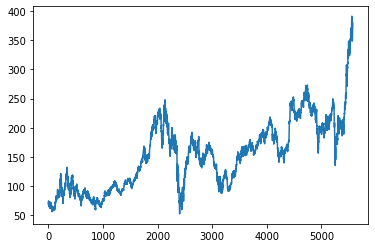

In [63]:
# 3. Exploratory Data Analysis
# Check overall stock price visually

import matplotlib.pyplot as plt
import numpy as np

filter = ['Close']
y = df.loc[:, filter]

plt.plot(y)
plt.show()

In [64]:
# 4. Feature Engineering and Variable Transformation
# We need only Open, High, Close, and Volume features.
# So we will delete unnecessary features.

needs = ['Open', 'High', 'Close', 'Volume']
y = df.loc[:,needs]

In [66]:
# The scale of volume is too high, so we will standardize the scale of the volume feature.

import scipy.stats as st

y['Volume'] = st.zscore(df['Volume'])
y

,Open,High,Close,Volume
0,76.000000,77.250000,70.375000,2.757911
1,69.875000,69.875000,69.125000,0.360362
2,68.000000,69.375000,67.937500,-0.396834
3,67.937500,74.875000,74.125000,-0.078909
4,73.375000,73.500000,70.687500,-0.448229
...,...,...,...,...
5572,363.000000,370.880005,368.750000,-0.427561
5573,368.820007,371.149994,368.769989,-0.417194
5574,367.799988,368.869995,368.709991,-0.571071
5575,374.859985,378.089996,372.619995,-0.484545


Text(0, 0.5, 'Increae of price comapred to yesterday')

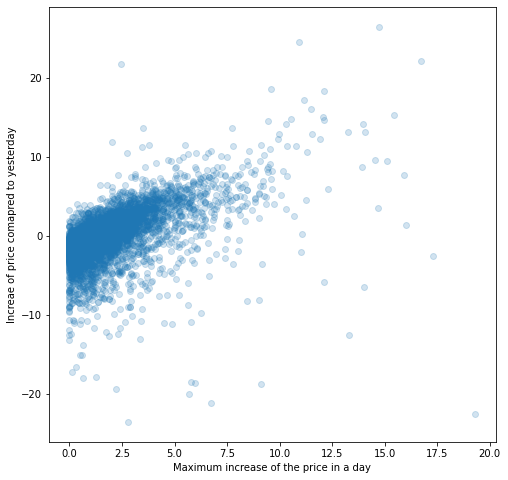

In [124]:
# Extract the features that we are interested in.

# 1. Find the Rise value of the day
x = y.loc[:, 'High'] - y.loc[:,'Open']
x = x.to_frame().rename(columns={0:'Rise'})

# 2. Find the change of Close price compared to yesterday
y.shape[0]
y1 = y.copy()
for i in range(1, y.shape[0]):
    y1.loc[i, 'Close'] = y.loc[i, 'Close'] - y.loc[i - 1, 'Close']
    
# 3. Data cleaning, Set the first change of Close price as mean value
y1.loc[0, 'Close'] = 0.055434
y1.mean()

# 4. Plot the relationship between x and y1
plt.figure(figsize=(8, 8))

plt.scatter(x, y1['Close'], alpha=0.2)
plt.xlabel('Maximum increase of the price in a day');
plt.ylabel('Increae of price comapred to yesterday')

## Analyze, High rise → Impact on tomorrow's price